In [1]:
import numpy as np
import stumpy
from datetime import datetime, timedelta
from icecream import ic
from tqdm import tqdm
import arrow
from dateutil import tz
import matplotlib.pyplot as plt

timezone = tz.gettz("Asia/Tokyo")

In [2]:
disney = [533937601, 533937602,
               533937501, 533937502, 533937503, 533937504,
               533937511, 533937512, 533937513, 533937514]

piscina = [574036351]

#change here!
target = piscina

In [3]:
def read_database(start=2016, stop=2024):
    db = {}
    for year in tqdm(np.arange(start, stop + 1, 1), desc="Reading database"):
        y = np.load(f"data/ntt_mss_{year}.npy")
        mids = np.load(f"data/ntt_mss_{year}_areas.npy")
        db[year] = (y, mids)
    return db

In [4]:
def join_database_of_meshcode(db, meshcode):
    for key in db.keys():
        meshids = db[key][1]
        try:
            pos = np.where(meshids == meshcode)[0].item()
        except:
            print(f"Meshcode {meshcode} not found in {key}")
            return None
        if key == 2016:
            data = db[key][0][:,pos]
        else:
            data = np.concatenate((data, db[key][0][:,pos]), axis=0)
    return data

In [5]:
def get_hours(start_year, start_month, start_day, start_hour, stop_year, stop_month, stop_day, stop_hour):
    start = datetime(start_year, start_month, start_day, start_hour, 0, 0, 0, tzinfo=timezone)
    stop = datetime(stop_year, stop_month, stop_day, stop_hour, 0, 0, 0, tzinfo=timezone)
    delta = stop - start
    return delta.days * 24 + delta.seconds // 3600

In [6]:
db = read_database()
target_db = {}
for meshcode in target:
    target_db[meshcode] = join_database_of_meshcode(db, meshcode)

Reading database: 100%|██████████| 9/9 [01:55<00:00, 12.80s/it]


In [7]:
#stack vertically all the data and sum them up
target_data = np.vstack([target_db[meshcode] for meshcode in target])
target_data = np.sum(target_data, axis=0)
target_data 

array([46, 28, 40, ..., 92, 88, 48])

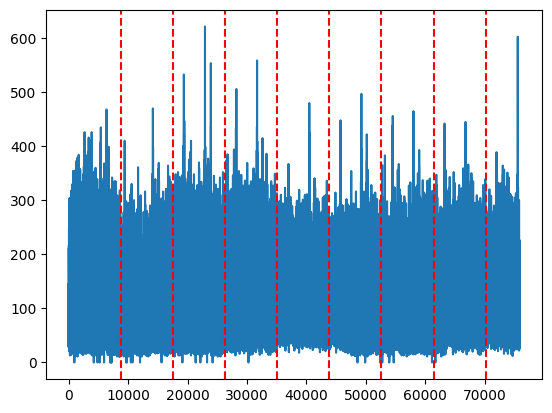

In [8]:
for meshcode in target:
    plt.plot(target_db[meshcode], label=meshcode)
plt.axvline(get_hours(2016, 1, 1, 0, 2017, 1, 1, 0), color='r', linestyle='--')
plt.axvline(get_hours(2016, 1, 1, 0, 2018, 1, 1, 0), color='r', linestyle='--')
plt.axvline(get_hours(2016, 1, 1, 0, 2019, 1, 1, 0), color='r', linestyle='--')
plt.axvline(get_hours(2016, 1, 1, 0, 2020, 1, 1, 0), color='r', linestyle='--')
plt.axvline(get_hours(2016, 1, 1, 0, 2021, 1, 1, 0), color='r', linestyle='--')
plt.axvline(get_hours(2016, 1, 1, 0, 2022, 1, 1, 0), color='r', linestyle='--')
plt.axvline(get_hours(2016, 1, 1, 0, 2023, 1, 1, 0), color='r', linestyle='--')
plt.axvline(get_hours(2016, 1, 1, 0, 2024, 1, 1, 0), color='r', linestyle='--')

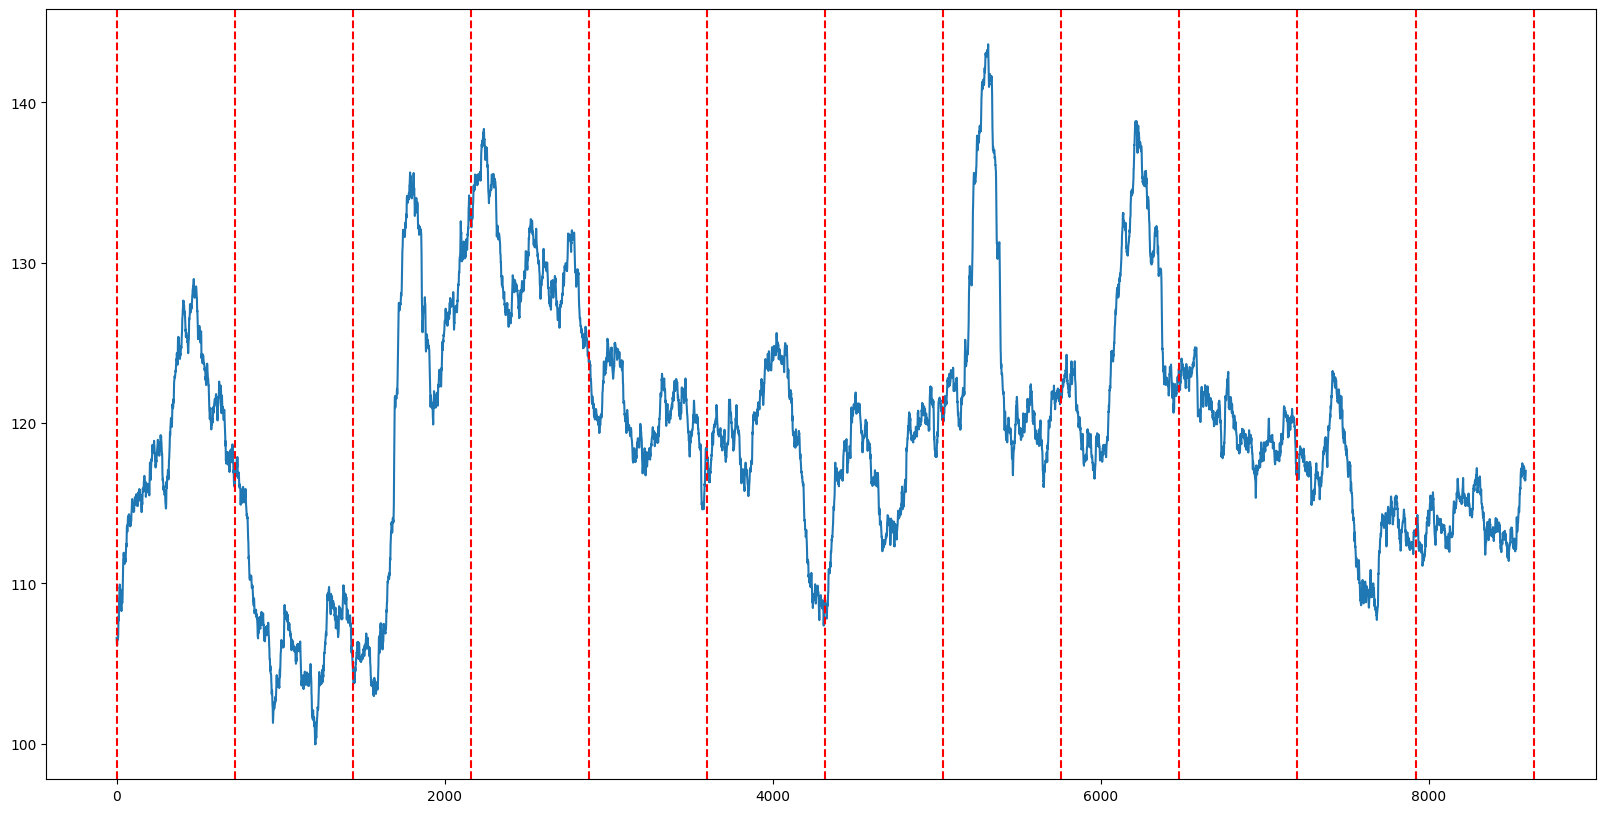

In [9]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

#a plot of 2023
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(moving_average(target_data[61368:70128],24*7))

#plot a vertical line every month
for i in range(0, target_data[61368:70128].shape[0], 30*24):
    ax.axvline(i, color='r', linestyle='--')


In [20]:
start = get_hours(2016, 1, 1, 0, 2023, 9, 3, 8)
finish = get_hours(2016, 1, 1, 0, 2023, 9, 3, 20)

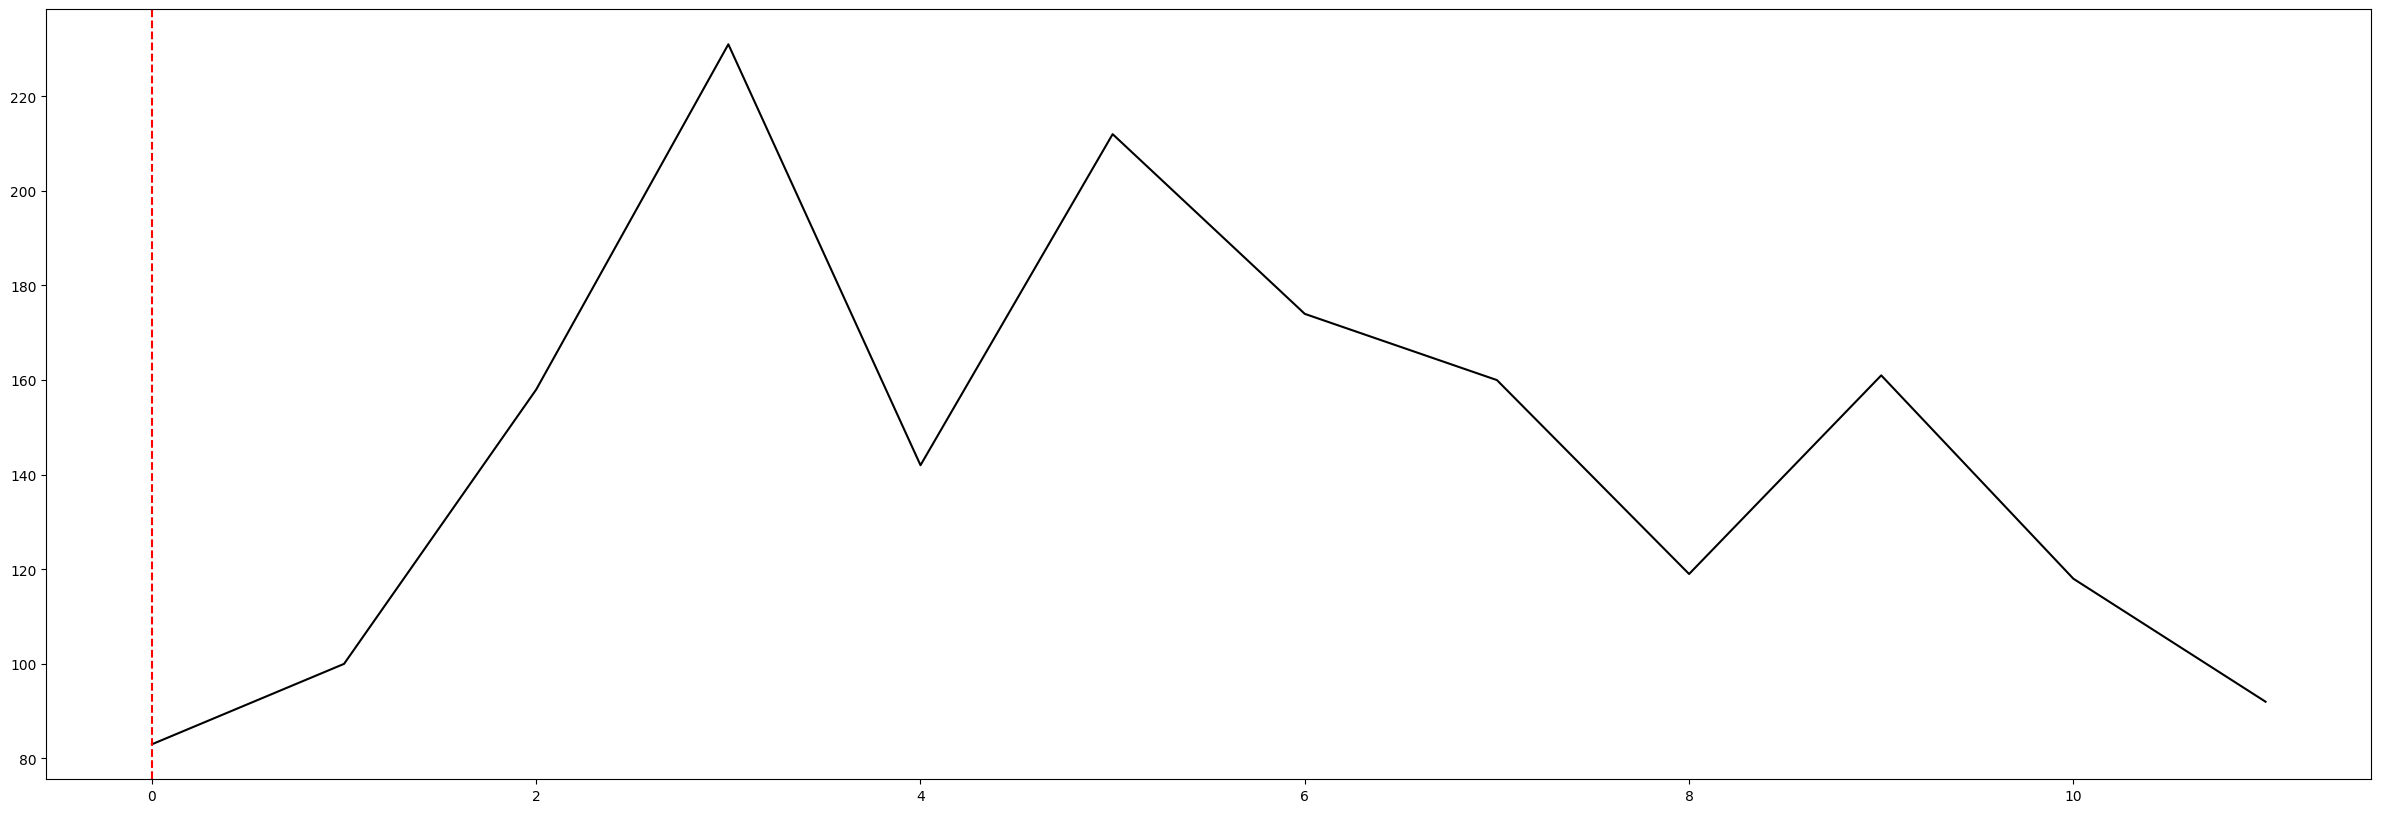

In [21]:
fig, ax = plt.subplots(figsize=(30,10))
for meshcode in target:
    ax.plot(target_db[meshcode][start:finish], label=meshcode, c='k')

#plot a vertical line every week
for i in range(0, target_db[meshcode][start:finish].shape[0], 1*24):
    ax.axvline(i, color='r', linestyle='--')